# Machine Learning Using Trees

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# public google drive link
file_id = "1IXlnod5xKmA0lrNBfo9aZmr1B-b4Dnvq"
url = f"https://drive.google.com/uc?id={file_id}"

# loading the dataset into a pandas DataFrame
spotify = pd.read_csv(url)
spotify.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
# displaying dataset information
print(f"Total rows (observations): {spotify.shape[0]}")
print(f"Total columns (features): {spotify.shape[1]}")
print("\nColumn names:\n", spotify.columns.tolist())

Total rows (observations): 8000
Total columns (features): 12

Column names:
 ['user_id', 'gender', 'age', 'country', 'subscription_type', 'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type', 'ads_listened_per_week', 'offline_listening', 'is_churned']


In [ ]:
spotify.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
# checking for null values
print(spotify.isnull().sum())

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64


In [ ]:
print(spotify.describe(include='all').T)

                        count unique      top  freq       mean         std  \
user_id                8000.0    NaN      NaN   NaN     4000.5  2309.54541   
gender                   8000      3     Male  2691        NaN         NaN   
age                    8000.0    NaN      NaN   NaN  37.662125   12.740359   
country                  8000      8       AU  1034        NaN         NaN   
subscription_type        8000      4  Premium  2115        NaN         NaN   
listening_time         8000.0    NaN      NaN   NaN  154.06825   84.015596   
songs_played_per_day   8000.0    NaN      NaN   NaN   50.12725   28.449762   
skip_rate              8000.0    NaN      NaN   NaN   0.300127    0.173594   
device_type              8000      3  Desktop  2778        NaN         NaN   
ads_listened_per_week  8000.0    NaN      NaN   NaN   6.943875   13.617953   
offline_listening      8000.0    NaN      NaN   NaN    0.74775    0.434331   
is_churned             8000.0    NaN      NaN   NaN   0.258875  

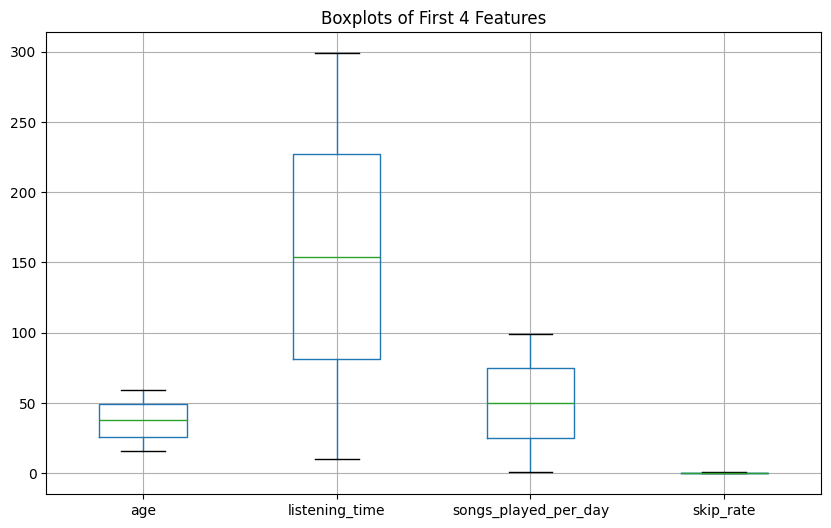

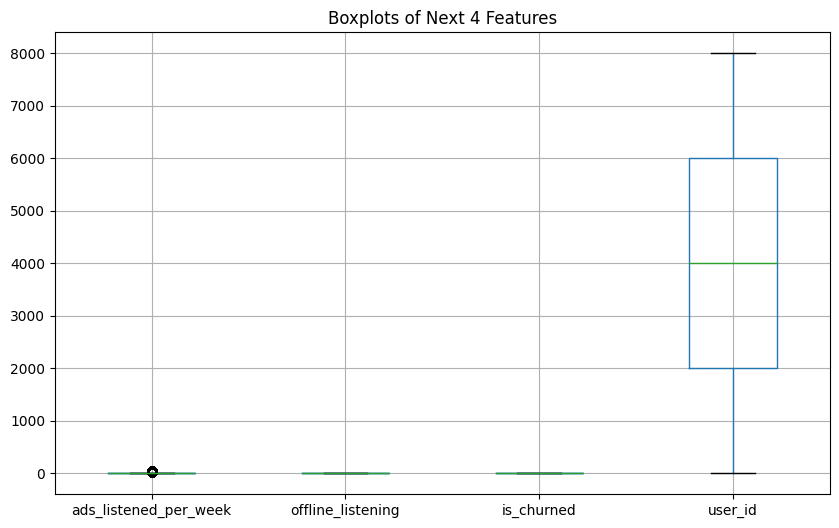

In [ ]:
# First 4 features
spotify[['age', 'listening_time', 'songs_played_per_day', 'skip_rate']].boxplot(figsize=(10,6))
plt.title("Boxplots of First 4 Features")
plt.show()

# Next 4 features
spotify[['ads_listened_per_week', 'offline_listening', 'is_churned', 'user_id']].boxplot(figsize=(10,6))
plt.title("Boxplots of Next 4 Features")
plt.show()

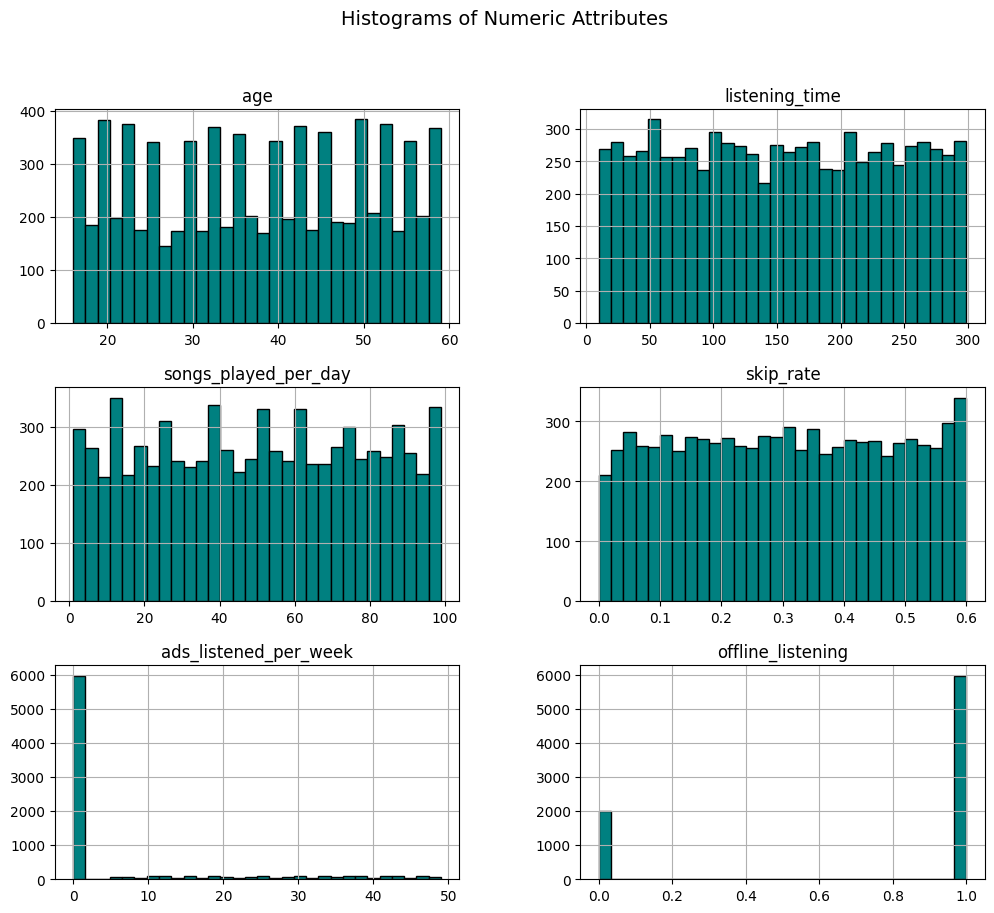

In [ ]:
numeric_cols = ['age', 'listening_time', 'songs_played_per_day',
                'skip_rate', 'ads_listened_per_week', 'offline_listening']

spotify[numeric_cols].hist(bins=30, figsize=(12,10), color='teal', edgecolor='black')
plt.suptitle("Histograms of Numeric Attributes", fontsize=14)
plt.show()

In [ ]:
# converting categorical columns to numerical
cat_cols = ['gender', 'country', 'subscription_type', 'device_type']

# one-hot encode categorical variables (drop_first=True to avoid dummy trap)
spotify_encoded = pd.get_dummies(spotify, columns=cat_cols, drop_first=True)

print("Encoded dataset shape:", spotify_encoded.shape)
spotify_encoded.head()

Encoded dataset shape: (8000, 22)


,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,gender_Male,gender_Other,...,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
0,1,54,26,23,0.20,31,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2,33,141,62,0.34,0,1,0,False,True,...,False,False,False,False,False,False,False,False,False,True
2,3,38,199,38,0.04,0,1,1,True,False,...,False,False,False,False,False,False,True,False,True,False
3,4,22,36,2,0.31,0,1,0,False,False,...,False,False,False,False,False,False,False,True,True,False
4,5,29,250,57,0.36,0,1,1,False,True,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# dropping identifier column before scaling
X = spotify_encoded.drop(columns=['user_id', 'is_churned'])
y = spotify_encoded['is_churned']

# standardization (mean = 0, std = 1)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)

# normalization (scale 0–1)
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

print("After Standardization:")
print(X_standardized.describe().round(2).T.head())
print("\nAfter Normalization:")
print(X_normalized.describe().round(2).T.head())


After Standardization:
                        count  mean  std   min   25%   50%   75%   max
age                    8000.0  -0.0  1.0 -1.70 -0.92  0.03  0.89  1.67
listening_time         8000.0  -0.0  1.0 -1.71 -0.87 -0.00  0.87  1.73
songs_played_per_day   8000.0   0.0  1.0 -1.73 -0.88 -0.00  0.87  1.72
skip_rate              8000.0   0.0  1.0 -1.73 -0.86 -0.00  0.86  1.73
ads_listened_per_week  8000.0  -0.0  1.0 -0.51 -0.51 -0.51 -0.14  3.09

After Normalization:
                        count  mean   std  min   25%   50%   75%  max
age                    8000.0  0.50  0.30  0.0  0.23  0.51  0.77  1.0
listening_time         8000.0  0.50  0.29  0.0  0.25  0.50  0.75  1.0
songs_played_per_day   8000.0  0.50  0.29  0.0  0.24  0.50  0.76  1.0
skip_rate              8000.0  0.50  0.29  0.0  0.25  0.50  0.75  1.0
ads_listened_per_week  8000.0  0.14  0.28  0.0  0.00  0.00  0.10  1.0


Correlation of all features with target variable (is_churned):

is_churned                   1.000000
skip_rate                    0.016121
device_type_Mobile           0.015955
country_PK                   0.014144
offline_listening            0.012754
country_DE                   0.012211
country_FR                   0.011247
songs_played_per_day         0.009314
gender_Other                 0.004839
age                          0.003982
subscription_type_Student    0.003892
ads_listened_per_week       -0.002279
country_US                  -0.004392
listening_time              -0.007624
country_CA                  -0.008776
country_UK                  -0.009698
gender_Male                 -0.011254
subscription_type_Premium   -0.011338
subscription_type_Free      -0.012754
device_type_Web             -0.013392
country_IN                  -0.013504
user_id                     -0.015994
Name: is_churned, dtype: float64


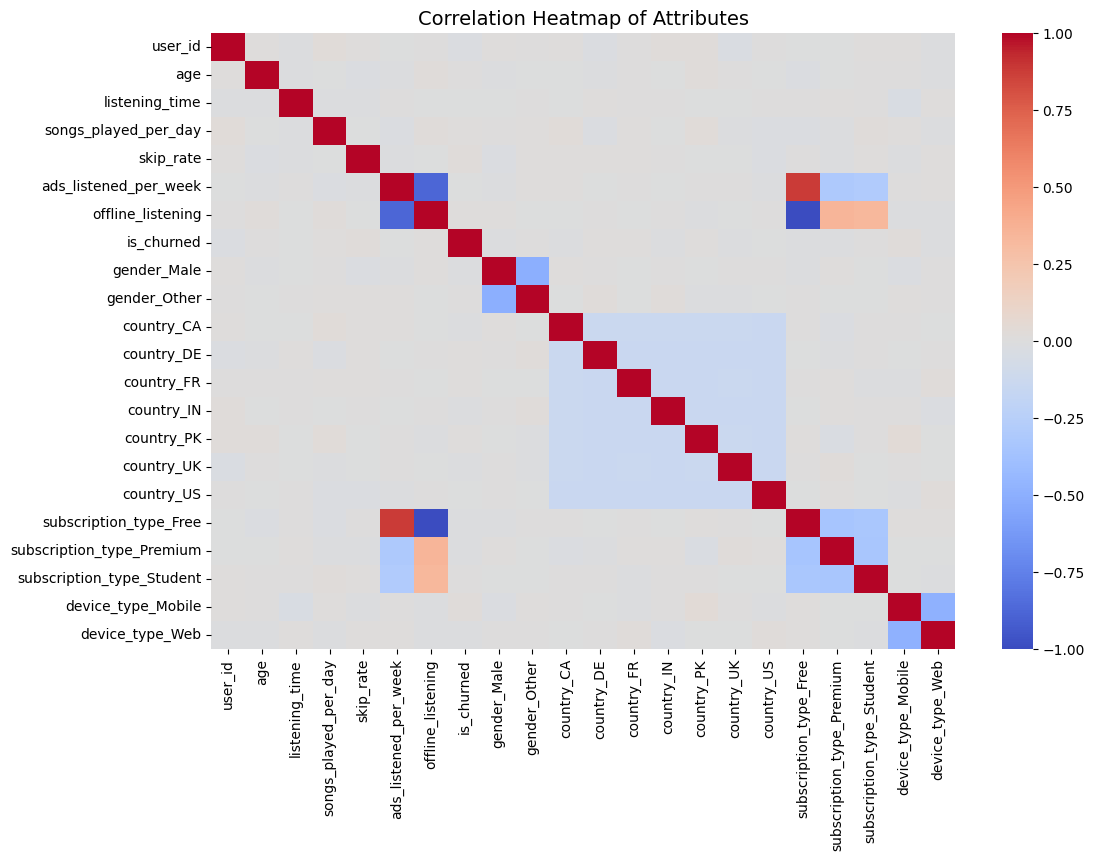

In [ ]:
# correlation matrix (using the encoded + scaled data)
corr_matrix = spotify_encoded.corr()

# correlation values with target variable
target_corr = corr_matrix['is_churned'].sort_values(ascending=False)
print("Correlation of all features with target variable (is_churned):\n")
print(target_corr)

# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Attributes", fontsize=14)
plt.show()


In [ ]:
X = spotify_encoded.drop(columns=['user_id', 'is_churned'])
y = spotify_encoded['is_churned']

# splitting into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (6400, 20)
Testing set size: (1600, 20)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# defining model and parameter grid
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch with 5-fold CV
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best Decision Tree parameters:", grid_dt.best_params_)
print("Best Decision Tree accuracy:", grid_dt.best_score_)

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree accuracy: 0.7410937500000001


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# defining the model
rf = RandomForestClassifier(random_state=42)

# parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest parameters:", grid_rf.best_params_)
print("Best Random Forest accuracy:", grid_rf.best_score_)


Best Random Forest parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest accuracy: 0.7415624999999999


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# defining the model
ada = AdaBoostClassifier(random_state=42)

# parameter grid
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# GridSearchCV
grid_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)
grid_ada.fit(X_train, y_train)

print("Best AdaBoost parameters:", grid_ada.best_params_)
print("Best AdaBoost accuracy:", grid_ada.best_score_)


Best AdaBoost parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best AdaBoost accuracy: 0.7410937500000001


In [ ]:
from xgboost import XGBClassifier

# defining the model
xgb = XGBClassifier(
    eval_metric='mlogloss',  # suppresses warning about evaluation metric
    use_label_encoder=False,
    random_state=42
)

# parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)
grid_xgb.fit(X_train.values, y_train.values)

print("Best XGBoost parameters:", grid_xgb.best_params_)
print("Best XGBoost accuracy:", grid_xgb.best_score_)


Best XGBoost parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best XGBoost accuracy: 0.7410937500000001


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:28:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


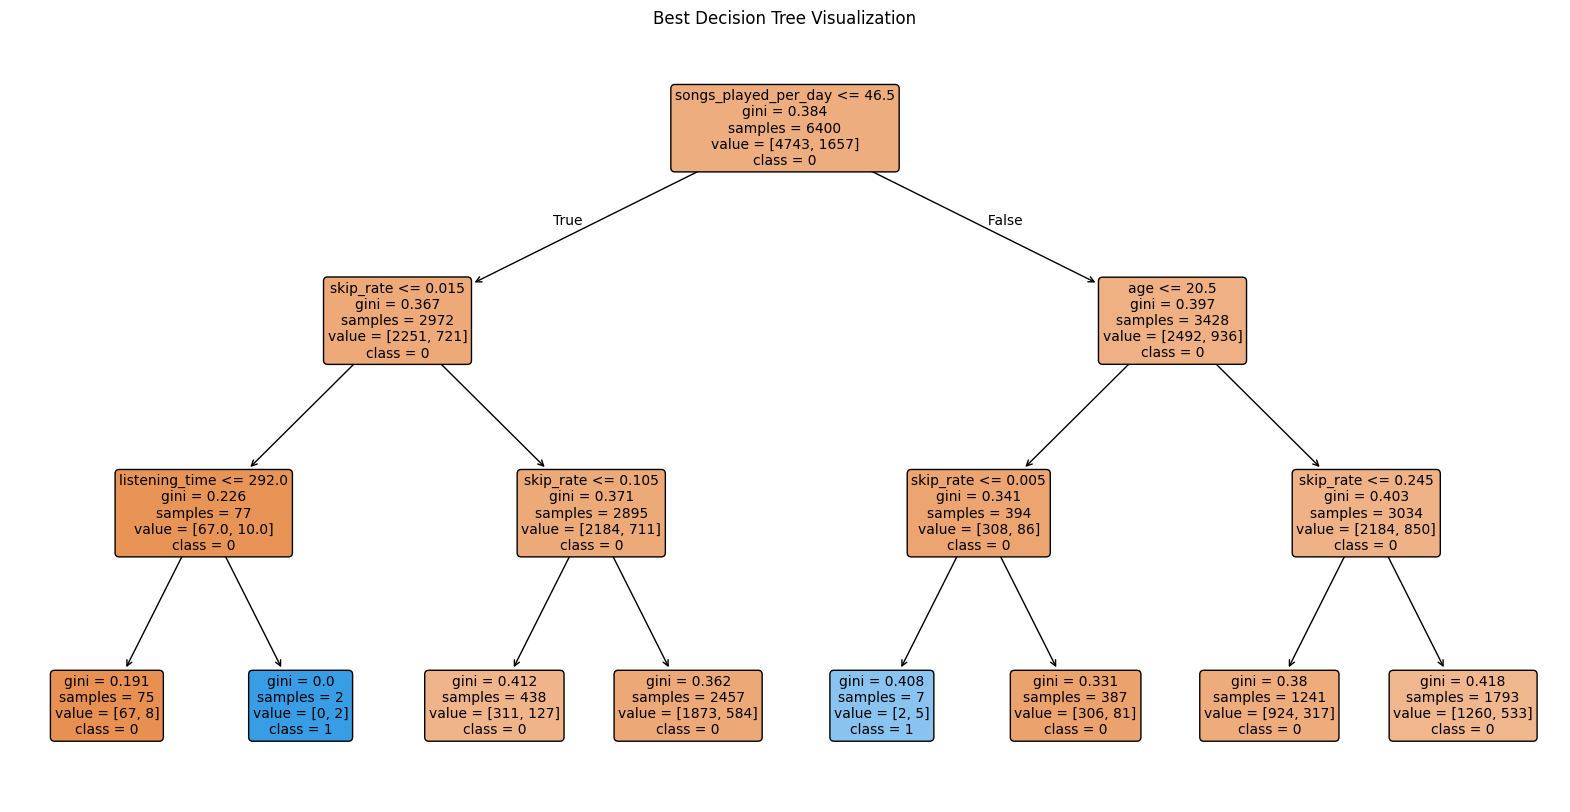

In [ ]:
from sklearn import tree

# visualizing the best decision tree
best_dt = grid_dt.best_estimator_

plt.figure(figsize=(20,10))
tree.plot_tree(
    best_dt,
    filled=True,
    feature_names=X_train.columns,
    class_names=['0', '1'],
    rounded=True,
    fontsize=10
)
plt.title("Best Decision Tree Visualization")
plt.show()


In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve
)
# best model from GridSearch
best_model = grid_rf.best_estimator_

# predictions on the test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # probability for ROC/PR


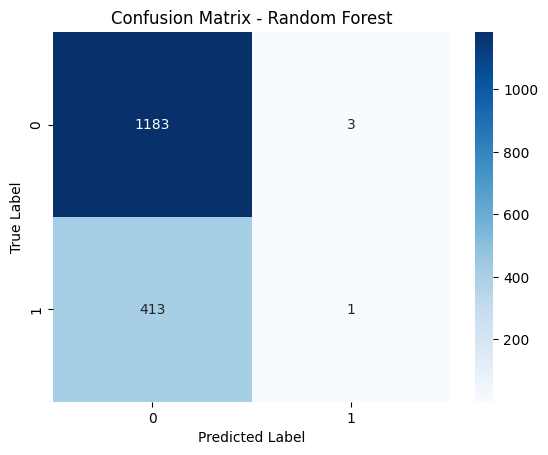

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1186
           1       0.25      0.00      0.00       414

    accuracy                           0.74      1600
   macro avg       0.50      0.50      0.43      1600
weighted avg       0.61      0.74      0.63      1600



In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))


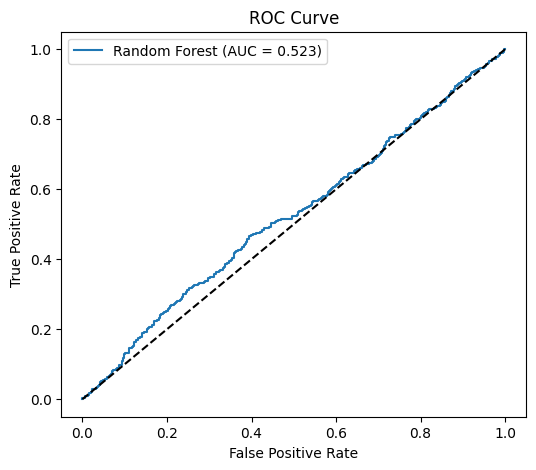

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


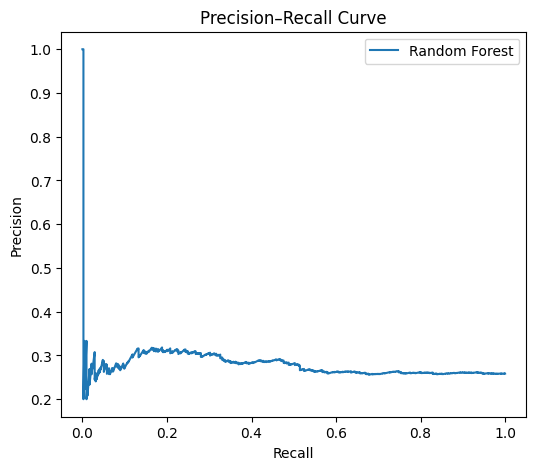

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label='Random Forest')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()
